In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("dataset/Travel tripsdataset.csv")
df

# trip dataset year 2023 

#linear regression + random forest regressor => target variable numerical = total cost 

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [3]:
df.info()
#Accommodation + Transportation cost should be numerical + some nans 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


In [4]:
#Checking nans
df[df.isna().any(axis=1)]

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
71,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,"Rome, Italy",4/15/2025,4/22/2025,7.0,James Kim,41.0,Male,American,Hotel,100,NaN,NaN
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#drop rows 71 + 127 + 82 because all columns filled with nan value
#not relevant doing KNN for only one row and not relevant either filling with median or mean since the std is very high for the 2 features missing (Accomodation + transportation cost) as we can see on the cell 31 => df.describe 
df=df.drop([71])
df=df.drop([127])
df=df.drop([82])

In [6]:
# no more nans
df[df.isna().any(axis=1)]

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost


In [7]:
df.describe(include="all")

#statistics missing for accommodation + transportation cost 

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
count,136.000000,136,136,136,136.000000,136,136.000000,136,136,136,136,136,136
unique,NaN,59,110,124,NaN,108,NaN,2,41,8,52,9,48
top,NaN,Paris,8/15/2023,7/8/2023,NaN,John Smith,NaN,Female,American,Hotel,1200,Plane,700
freq,NaN,7,4,3,NaN,6,NaN,70,23,59,7,57,10
mean,69.463235,NaN,NaN,NaN,7.610294,NaN,33.117647,NaN,NaN,NaN,NaN,NaN,NaN
std,40.388284,NaN,NaN,NaN,1.606343,NaN,7.139933,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,5.000000,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,34.750000,NaN,NaN,NaN,7.000000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,68.500000,NaN,NaN,NaN,7.000000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,104.250000,NaN,NaN,NaN,8.000000,NaN,37.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df["Accommodation cost"].unique()
# clean the "USD" + "$" + convert to integer 

array(['1200', '800', '1000', '2000', '700', '1500', '500', '900', '2500',
       '3000', '1400', '600', '$900 ', '$1,500 ', '$1,200 ', '$600 ',
       '$1,000 ', '$700 ', '$400 ', '$1,400 ', '$2,000 ', '$1,100 ',
       '$800 ', '$200 ', '$150 ', '$500 ', '$180 ', '$350 ', '2200',
       '400', '1100', '300', '1300', '1800', '500 USD', '1000 USD',
       '800 USD', '1200 USD', '400 USD', '600 USD', '900 USD', '1500 USD',
       '700 USD', '300 USD', '200 USD', '$300 ', '200', '5000', '7000',
       '6000', '4000', '8000'], dtype=object)

In [9]:
df['Accommodation cost']=df['Accommodation cost'].str.replace('USD','')
df['Accommodation cost']=df['Accommodation cost'].str.replace('$','')
df['Accommodation cost']=df['Accommodation cost'].str.replace(',','')
df['Accommodation cost']=df['Accommodation cost'].astype(int)

In [10]:
df["Transportation cost"].unique()
# clean the "USD" + "$" + convert to integer 

array(['600', '500', '700', '1000', '200', '800', '1200', '100', '400',
       '150', '$400 ', '$700 ', '$150 ', '$800 ', '$100 ', '$600 ',
       '$80 ', '$500 ', '$300 ', '$50 ', '$120 ', '$75 ', '900', '50',
       '$200 ', '$250 ', '$20 ', '300', '800 USD', '200 USD', '500 USD',
       '700 USD', '300 USD', '600 USD', '400 USD', '1000 USD', '100 USD',
       '350 USD', '150 USD', '$1,200 ', '$900 ', '$1,500 ', '$1,000 ',
       '250', '2500', '1500', '2000', '3000'], dtype=object)

In [11]:
df['Transportation cost']=df['Transportation cost'].str.replace('USD','')
df['Transportation cost']=df['Transportation cost'].str.replace('$','')
df['Transportation cost']=df['Transportation cost'].str.replace(',','')
df['Transportation cost']=df['Transportation cost'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               136 non-null    int64  
 1   Destination           136 non-null    object 
 2   Start date            136 non-null    object 
 3   End date              136 non-null    object 
 4   Duration (days)       136 non-null    float64
 5   Traveler name         136 non-null    object 
 6   Traveler age          136 non-null    float64
 7   Traveler gender       136 non-null    object 
 8   Traveler nationality  136 non-null    object 
 9   Accommodation type    136 non-null    object 
 10  Accommodation cost    136 non-null    int32  
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    int32  
dtypes: float64(2), int32(2), int64(1), object(8)
memory usage: 13.8+ KB


In [13]:
df.describe(include="all")
#the dataset is a bit skewed to the left 

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
count,136.000000,136,136,136,136.000000,136,136.000000,136,136,136,136.000000,136,136.000000
unique,NaN,59,110,124,NaN,108,NaN,2,41,8,NaN,9,NaN
top,NaN,Paris,8/15/2023,7/8/2023,NaN,John Smith,NaN,Female,American,Hotel,NaN,Plane,NaN
freq,NaN,7,4,3,NaN,6,NaN,70,23,59,NaN,57,NaN
mean,69.463235,NaN,NaN,NaN,7.610294,NaN,33.117647,NaN,NaN,NaN,1253.529412,NaN,645.183824
std,40.388284,NaN,NaN,NaN,1.606343,NaN,7.139933,NaN,NaN,NaN,1338.644162,NaN,584.476153
min,1.000000,NaN,NaN,NaN,5.000000,NaN,20.000000,NaN,NaN,NaN,150.000000,NaN,20.000000
25%,34.750000,NaN,NaN,NaN,7.000000,NaN,28.000000,NaN,NaN,NaN,600.000000,NaN,200.000000
50%,68.500000,NaN,NaN,NaN,7.000000,NaN,31.000000,NaN,NaN,NaN,900.000000,NaN,550.000000
75%,104.250000,NaN,NaN,NaN,8.000000,NaN,37.250000,NaN,NaN,NaN,1200.000000,NaN,800.000000


In [14]:
df.corr(numeric_only=True)
#transportation + accommodation cost are highly correlated 

,Trip ID,Duration (days),Traveler age,Accommodation cost,Transportation cost
Trip ID,1.000000,-0.039328,0.065517,0.348656,0.448495
Duration (days),-0.039328,1.000000,-0.118039,-0.129948,-0.001185
Traveler age,0.065517,-0.118039,1.000000,0.039396,0.054533
Accommodation cost,0.348656,-0.129948,0.039396,1.000000,0.787319
Transportation cost,0.448495,-0.001185,0.054533,0.787319,1.000000


In [15]:
#droping traveler name + Trip ID  because it is not relevant 
df = df.drop(['Traveler name'], axis=1)
df = df.drop(['Trip ID'], axis=1)
df

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,"London, UK",5/1/2023,5/8/2023,7.0,35.0,Male,American,Hotel,1200,Flight,600
1,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,28.0,Female,Canadian,Resort,800,Flight,500
2,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,45.0,Male,Korean,Villa,1000,Flight,700
3,"New York, USA",8/15/2023,8/29/2023,14.0,29.0,Female,British,Hotel,2000,Flight,1000
4,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...
134,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,34.0,Male,Chinese,Hostel,2000,Train,1000
137,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [16]:
df["Traveler nationality"].unique()
#cleaning duplicate nationalities 

array(['American', 'Canadian', 'Korean', 'British', 'Vietnamese',
       'Australian', 'Brazilian', 'Dutch', 'Emirati', 'Mexican',
       'Spanish', 'Chinese', 'German', 'Moroccan', 'Scottish', 'Japanese',
       'Italian', 'Indian', 'South Korean', 'French', 'South African',
       'Taiwanese', 'Indonesian', 'USA', 'Canada', 'South Korea', 'UK',
       'China', 'Taiwan', 'Japan', 'Spain', 'Brazil', 'Germany',
       'Hong Kong', 'United Kingdom', 'Singapore', 'Italy', 'Greece',
       'United Arab Emirates', 'Cambodia', 'New Zealander'], dtype=object)

In [17]:

df['Traveler nationality']=df['Traveler nationality'].str.replace('Canada','Canadian')
df['Traveler nationality']=df['Traveler nationality'].str.replace('Spain','Spanish')
df['Traveler nationality']=df['Traveler nationality'].str.replace('United Arab Emirates','Emirati')
df['Traveler nationality']=df['Traveler nationality'].str.replace('China','Chinese')
df['Traveler nationality']=df['Traveler nationality'].str.replace('Hong Kong','Chinese')
df['Traveler nationality']=df['Traveler nationality'].str.replace('Scottish','UK')
df['Traveler nationality']=df['Traveler nationality'].str.replace('United Kingdom','UK')
df['Traveler nationality']=df['Traveler nationality'].str.replace('British','UK')
df['Traveler nationality']=df['Traveler nationality'].replace('Japan','Japanese')
df['Traveler nationality']=df['Traveler nationality'].replace('Germany','German')
df['Traveler nationality']=df['Traveler nationality'].replace('Brazil','Brazilian')
df['Traveler nationality']=df['Traveler nationality'].replace('Italy','Italian')
df['Traveler nationality']=df['Traveler nationality'].replace('Taiwan','Taiwanese')
df['Traveler nationality']=df['Traveler nationality'].replace('South Korea','Korean')
df['Traveler nationality']=df['Traveler nationality'].replace('South Korean','Korean')
df['Traveler nationality']=df['Traveler nationality'].replace('American','US American')
df['Traveler nationality']=df['Traveler nationality'].replace('USA','US American')

In [18]:
df["Traveler nationality"].unique()

array(['US American', 'Canadian', 'Korean', 'UK', 'Vietnamese',
       'Australian', 'Brazilian', 'Dutch', 'Emirati', 'Mexican',
       'Spanish', 'Chinese', 'German', 'Moroccan', 'Japanese', 'Italian',
       'Indian', 'French', 'South African', 'Taiwanese', 'Indonesian',
       'Singapore', 'Greece', 'Cambodia', 'New Zealander'], dtype=object)

In [19]:
df["Destination"].unique()
#cleaning duplicate destination  

array(['London, UK', 'Phuket, Thailand', 'Bali, Indonesia',
       'New York, USA', 'Tokyo, Japan', 'Paris, France',
       'Sydney, Australia', 'Rio de Janeiro, Brazil',
       'Amsterdam, Netherlands', 'Dubai, United Arab Emirates',
       'Cancun, Mexico', 'Barcelona, Spain', 'Honolulu, Hawaii',
       'Berlin, Germany', 'Marrakech, Morocco', 'Edinburgh, Scotland',
       'Paris', 'Bali', 'London', 'Tokyo', 'New York', 'Sydney', 'Rome',
       'Bangkok', 'Hawaii', 'Barcelona', 'Japan', 'Thailand', 'France',
       'Australia', 'Brazil', 'Greece', 'Egypt', 'Mexico', 'Italy',
       'Spain', 'Canada', 'New York City, USA', 'Bangkok, Thailand',
       'Vancouver, Canada', 'Sydney, AUS', 'Seoul, South Korea',
       'Los Angeles, USA', 'Rome, Italy', 'Cape Town', 'Cape Town, SA',
       'Sydney, Aus', 'Bangkok, Thai', 'Phuket, Thai', 'Dubai', 'Seoul',
       'Rio de Janeiro', 'Amsterdam', 'Phuket', 'Santorini', 'Phnom Penh',
       'Athens, Greece', 'Cape Town, South Africa',
       'Au

In [20]:
df['Destination']=df['Destination'].replace('Paris','France')
df['Destination']=df['Destination'].replace('Bali','Indonesia')
df['Destination']=df['Destination'].replace('Barcelona','Spain')
df['Destination']=df['Destination'].replace('Sydney, Australia','Australia')
df['Destination']=df['Destination'].replace('Rome','Italy')
df['Destination']=df['Destination'].replace('Rio de Janeiro','Brazil')
df['Destination']=df['Destination'].replace('Phnom Penh','Vietnam')
df['Destination']=df['Destination'].replace('Santorini','Greece')
df['Destination']=df['Destination'].replace('Bali','Indonesia')
df['Destination']=df['Destination'].replace('Barcelona','Spain')
df['Destination']=df['Destination'].replace('Sydney','Australia')
df['Destination']=df['Destination'].replace('Rome','Italy')
df['Destination']=df['Destination'].replace('Rio de Janeiro','Brazil')
df['Destination']=df['Destination'].replace('Phnom Penh','Vietnam')
df['Destination']=df['Destination'].replace('Paris, France','France')
df['Destination']=df['Destination'].replace('Phuket, Thailand','Thailand')
df['Destination']=df['Destination'].replace('Sydney, Aus','Australia')
df['Destination']=df['Destination'].replace('Phuket, Thailand ','Thailand')
df['Destination']=df['Destination'].replace('Sydney, Aus','Australia')
df['Destination']=df['Destination'].replace('Bangkok, Thai','Thailand')
df['Destination']=df['Destination'].replace('New York','USA')
df['Destination']=df['Destination'].replace('New York City, USA ','USA')
df['Destination']=df['Destination'].replace('Vancouver, Canada ','Canada')
df['Destination']=df['Destination'].replace('London, UK','UK')
df['Destination']=df['Destination'].replace('New York, USA','USA')
df['Destination']=df['Destination'].replace('Tokyo, Japan','Japan')
df['Destination']=df['Destination'].replace('Amsterdam, Netherlands','Netherlands')
df['Destination']=df['Destination'].replace('Dubai, United Arab Emirates','UAE')
df['Destination']=df['Destination'].replace('Cancun, Mexico','Mexico')
df['Destination']=df['Destination'].replace('Honolulu, Hawaii','Hawaii')
df['Destination']=df['Destination'].replace('Edinburgh, Scotland ','UK')
df['Destination']=df['Destination'].replace('London','UK')
df['Destination']=df['Destination'].replace('Los Angeles, USA','USA')
df['Destination']=df['Destination'].replace('Tokyo','Japan')
df['Destination']=df['Destination'].replace('Amsterdam','Netherlands')
df['Destination']=df['Destination'].replace('Dubai','UAE')
df['Destination']=df['Destination'].replace('Marrakech, Morocco','Morocco')
df['Destination']=df['Destination'].replace('Bangkok, Thailand','Thailand')
df['Destination']=df['Destination'].replace('Bali, Indonesia','Indonesia')
df['Destination']=df['Destination'].replace('Rio de Janeiro, Brazil','Brazil')
df['Destination']=df['Destination'].replace('Barcelona, Spain','Spain')
df['Destination']=df['Destination'].replace('Berlin, Germany','Germany')
df['Destination']=df['Destination'].replace('Edinburgh, Scotland','UK')
df['Destination']=df['Destination'].replace('Bangkok','Thailand')
df['Destination']=df['Destination'].replace('New York City, USA','USA')
df['Destination']=df['Destination'].replace('Bangkok, Thailand','Thailand')
df['Destination']=df['Destination'].replace('Vancouver, Canada','Canada')
df['Destination']=df['Destination'].replace('Sydney, AUS','Australia')
df['Destination']=df['Destination'].replace('Seoul, South Korea','South Korea')
df['Destination']=df['Destination'].replace('Rome, Italy','Italy')
df['Destination']=df['Destination'].replace('Cape Town','South Africa')
df['Destination']=df['Destination'].replace('Phuket, Thai','Thailand')
df['Destination']=df['Destination'].replace('Seoul','South Korea')
df['Destination']=df['Destination'].replace('Phuket','Thailand')
df['Destination']=df['Destination'].replace('Athens, Greece','Greece')
df['Destination']=df['Destination'].replace('Cape Town, SA','South Africa')
df['Destination']=df['Destination'].replace('Cape Town, South Africa','South Africa')
df['Destination']=df['Destination'].replace('Auckland, New Zealand','New Zealand')

In [21]:
df["Destination"].value_counts()
#countries only 
#I choose to let Hawaii on it's own and not add it to USA 

Destination
France          15
Japan           13
Australia       13
Thailand        12
Indonesia       12
USA             11
Italy            9
UK               8
Spain            7
Brazil           6
Mexico           5
South Africa     4
UAE              3
Netherlands      3
Greece           3
Canada           3
Hawaii           2
South Korea      2
Germany          1
Morocco          1
Egypt            1
Vietnam          1
New Zealand      1
Name: count, dtype: int64

In [22]:
df["Transportation type"].value_counts()
#dealing with outliers Subway /Ferry / bus =>  Bus & other

Transportation type
Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Airplane       5
Car            3
Subway         1
Ferry          1
Name: count, dtype: int64

In [23]:
df['Transportation type']=df['Transportation type'].replace('Flight','Airplane')
df['Transportation type']=df['Transportation type'].replace('Plane','Airplane')
df['Transportation type']=df['Transportation type'].replace('Car rental','Car')
df['Transportation type']=df['Transportation type'].replace('Ferry','Bus')
df['Transportation type']=df['Transportation type'].replace('Subway','Bus')

In [24]:
df['Transportation type']=df['Transportation type'].replace('Bus','Bus & other')

In [25]:
df["Transportation type"].value_counts()
#cleaning duplicate 

Transportation type
Airplane       75
Train          37
Car            16
Bus & other     8
Name: count, dtype: int64

In [26]:
df["Accommodation type"].value_counts()

Accommodation type
Hotel              59
Airbnb             30
Hostel             24
Resort             14
Villa               4
Vacation rental     3
Riad                1
Guesthouse          1
Name: count, dtype: int64

In [27]:
#studying the variables (internet research) 
#analysing the outliers type of accommodation in comparison to other types 

#the outliers 
df.loc[df["Accommodation type"] == 'Villa']
display(df.loc[df["Accommodation type"] == 'Villa'])
df.loc[df["Accommodation type"] == 'Riad']
display(df.loc[df["Accommodation type"] == 'Riad'])
df.loc[df["Accommodation type"] == 'Guesthouse']
display(df.loc[df["Accommodation type"] == 'Guesthouse'])
df.loc[df["Accommodation type"] == 'Vacation rental']
display(df.loc[df["Accommodation type"] == 'Vacation rental'])

#the types they might fit in 
df.loc[df["Accommodation type"] == 'Resort']
display(df.loc[df["Accommodation type"] == 'Resort'])
df.loc[df["Accommodation type"] == 'Hostel']
display(df.loc[df["Accommodation type"] == 'Hostel'])
df.loc[df["Accommodation type"] == 'Airbnb']
display(df.loc[df["Accommodation type"] == 'Airbnb'])


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
2,Indonesia,7/1/2023,7/8/2023,7.0,45.0,Male,Korean,Villa,1000,Airplane,700
92,Indonesia,4/15/2022,4/25/2022,11.0,33.0,Male,Indonesian,Villa,1500,Car,300
103,Indonesia,7/22/2024,7/28/2024,6.0,29.0,Female,Korean,Villa,1200,Airplane,1000
111,Thailand,9/5/2022,9/12/2022,7.0,45.0,Male,Singapore,Villa,2000,Airplane,700


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
14,Morocco,8/20/2024,8/27/2024,7.0,26.0,Female,Moroccan,Riad,600,Airplane,400


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
76,South Africa,9/1/2023,9/10/2023,9.0,31.0,Male,South African,Guesthouse,400,Car,300


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
62,South Africa,1/7/2023,1/16/2023,9.0,29.0,Female,UK,Vacation rental,800,Car,200
64,Spain,8/18/2023,8/25/2023,7.0,31.0,Female,Spanish,Vacation rental,900,Airplane,700
67,USA,7/20/2024,7/26/2024,6.0,25.0,Male,US American,Vacation rental,1000,Airplane,800


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
1,Thailand,6/15/2023,6/20/2023,5.0,28.0,Female,Canadian,Resort,800,Airplane,500
9,UAE,3/10/2024,3/17/2024,7.0,39.0,Male,Emirati,Resort,2500,Airplane,800
12,Hawaii,6/10/2024,6/18/2024,8.0,29.0,Female,Chinese,Resort,3000,Airplane,1200
17,Indonesia,8/15/2023,8/25/2023,10.0,28.0,Male,Chinese,Resort,1500,Airplane,700
25,Hawaii,8/1/2023,8/10/2023,9.0,34.0,Male,Korean,Resort,2000,Airplane,800
41,Mexico,7/1/2023,7/8/2023,7.0,45.0,Male,US American,Resort,2200,Airplane,800
65,Indonesia,2/1/2024,2/8/2024,7.0,27.0,Male,US American,Resort,2200,Airplane,1000
70,Indonesia,5/21/2025,5/29/2025,8.0,37.0,Female,UK,Resort,1800,Airplane,1000
72,Indonesia,8/5/2022,8/12/2022,7.0,35.0,Female,Korean,Resort,500,Airplane,800
74,Mexico,4/15/2023,4/22/2023,7.0,42.0,Female,Mexican,Resort,800,Airplane,500


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
6,Australia,11/20/2023,11/30/2023,10.0,33.0,Female,Australian,Hostel,500,Airplane,1200
23,Thailand,9/15/2023,9/23/2023,8.0,40.0,Male,Indian,Hostel,400,Airplane,500
28,Thailand,6/15/2022,6/22/2022,7.0,45.0,Male,Canadian,Hostel,200,Train,150
31,Brazil,9/5/2022,9/14/2022,9.0,33.0,Female,Australian,Hostel,150,Bus & other,50
35,Italy,2/14/2023,2/20/2023,6.0,31.0,Female,US American,Hostel,180,Train,120
40,Japan,12/10/2022,12/18/2022,8.0,28.0,Female,Chinese,Hostel,500,Airplane,900
44,Spain,8/18/2023,8/25/2023,7.0,27.0,Female,Spanish,Hostel,600,Airplane,600
47,Canada,7/10/2022,7/17/2022,7.0,24.0,Male,Korean,Hostel,400,Train,150
50,Japan,10/10/2023,10/20/2023,10.0,25.0,Male,US American,Hostel,500,Bus & other,100
54,Thailand,2/1/2024,2/9/2024,8.0,23.0,Female,Indian,Hostel,400,Bus & other,50


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
4,Japan,9/10/2023,9/17/2023,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200
7,Brazil,1/5/2024,1/12/2024,7.0,25.0,Male,Brazilian,Airbnb,900,Airplane,600
11,Spain,5/15/2024,5/22/2024,7.0,36.0,Male,Spanish,Airbnb,800,Train,100
20,USA,11/20/2023,11/25/2023,5.0,27.0,Female,US American,Airbnb,600,Bus & other,100
22,Italy,11/1/2023,11/8/2023,7.0,29.0,Female,Italian,Airbnb,700,Train,80
29,France,7/2/2022,7/11/2022,9.0,25.0,Male,Korean,Airbnb,600,Car,300
32,Greece,10/12/2022,10/20/2022,8.0,20.0,Male,US American,Airbnb,400,Airplane,600
34,Mexico,1/5/2023,1/15/2023,10.0,42.0,Male,UK,Airbnb,500,Airplane,800
37,Canada,4/19/2023,4/26/2023,7.0,38.0,Female,Australian,Airbnb,350,Bus & other,75
39,Australia,1/2/2023,1/9/2023,7.0,33.0,Male,Canadian,Airbnb,800,Train,150


In [28]:
# based on destination, price and type of accomodation i decided to aggregated those type of accomodation 
# group villa and resort => luxury stay 
# vacation rental + riad =>  airbnb 
# guesthouse =>  hostel 

In [29]:
df['Accommodation type']=df['Accommodation type'].replace('Resort','Luxury stay')
df['Accommodation type']=df['Accommodation type'].replace('Villa','Luxury stay')
df['Accommodation type']=df['Accommodation type'].replace('Riad','Airbnb')
df['Accommodation type']=df['Accommodation type'].replace('Vacation rental','Airbnb')
df['Accommodation type']=df['Accommodation type'].replace('Guesthouse','Hostel')

In [30]:
df["Accommodation type"].value_counts()

Accommodation type
Hotel          59
Airbnb         34
Hostel         25
Luxury stay    18
Name: count, dtype: int64

In [31]:
df.describe(include = "all")
#High std on accommodation + transportation cost 
# skewed to the right 

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
count,136,136,136,136.000000,136.000000,136,136,136,136.000000,136,136.000000
unique,23,110,124,NaN,NaN,2,25,4,NaN,4,NaN
top,France,8/15/2023,7/8/2023,NaN,NaN,Female,US American,Hotel,NaN,Airplane,NaN
freq,15,4,3,NaN,NaN,70,25,59,NaN,75,NaN
mean,NaN,NaN,NaN,7.610294,33.117647,NaN,NaN,NaN,1253.529412,NaN,645.183824
std,NaN,NaN,NaN,1.606343,7.139933,NaN,NaN,NaN,1338.644162,NaN,584.476153
min,NaN,NaN,NaN,5.000000,20.000000,NaN,NaN,NaN,150.000000,NaN,20.000000
25%,NaN,NaN,NaN,7.000000,28.000000,NaN,NaN,NaN,600.000000,NaN,200.000000
50%,NaN,NaN,NaN,7.000000,31.000000,NaN,NaN,NaN,900.000000,NaN,550.000000
75%,NaN,NaN,NaN,8.000000,37.250000,NaN,NaN,NaN,1200.000000,NaN,800.000000


In [32]:
#add columns age range / destination region / season / traveler region / budget (based on transport + accomodation cost)
#tp make it easier to plot 

In [33]:
#add columns age range 
df["Traveler age"].unique()

array([35., 28., 45., 29., 26., 42., 33., 25., 31., 39., 27., 36., 48.,
       32., 30., 40., 24., 34., 20., 37., 38., 55., 41., 23., 43., 46.,
       60., 50., 47.])

In [34]:
#add columns age range based on statistics of the cell df.describe (25%, 50%, 75%)
def age_range(x):
    if x < 29:
        return '20 - 28'
    elif x < 32:
        return '29 - 31'
    elif x < 38:
        return '32 - 37'
    else: 
        return '38 +'
    
df["Age range"] = df["Traveler age"].apply(lambda x: age_range(x))

In [35]:
#add columns  destination region 
df["Destination"].unique()

array(['UK', 'Thailand', 'Indonesia', 'USA', 'Japan', 'France',
       'Australia', 'Brazil', 'Netherlands', 'UAE', 'Mexico', 'Spain',
       'Hawaii', 'Germany', 'Morocco', 'Italy', 'Greece', 'Egypt',
       'Canada', 'South Korea', 'South Africa', 'Vietnam', 'New Zealand'],
      dtype=object)

In [36]:
#add columns  destination region 

def destination_region(x):
    if x == 'Thailand ' or x == 'Indonesia' or x == 'Japan' or x == 'Australia' or x == 'South Korea' or x == 'Vietnam' or x == 'New Zealand':
        return 'Asia'
    elif x == 'UK' or x == 'France' or x == 'Netherlands' or x == 'Spain' or x == 'Germany' or x == 'Italy' or x == 'Greece':
        return 'Europe'
    elif x == 'USA' or x == 'Canada' or x == 'Hawaii':
        return 'North America'
    elif x == 'Mexico' or x == 'Brazil':
        return 'South America'
    elif x == 'UAE' or x == 'Egypt':
        return 'Middle east'
    else: 
        return 'Africa'

df['Destination Region'] = df["Destination"].apply(lambda x: destination_region(x))

In [37]:
#add columns traveler region 
df["Traveler nationality"].unique()

array(['US American', 'Canadian', 'Korean', 'UK', 'Vietnamese',
       'Australian', 'Brazilian', 'Dutch', 'Emirati', 'Mexican',
       'Spanish', 'Chinese', 'German', 'Moroccan', 'Japanese', 'Italian',
       'Indian', 'French', 'South African', 'Taiwanese', 'Indonesian',
       'Singapore', 'Greece', 'Cambodia', 'New Zealander'], dtype=object)

In [38]:
#add columns traveler region 
def traveler_region(x):
    if x == 'Korean' or x == 'Vietnamese' or x == 'Australian' or x == 'Chinese' or x == 'Japanese' or x == 'Indian' or x == 'Indonesian' or x == 'Singapore' or x == 'Cambodia' or x == 'New Zealander':
        return 'Asia'
    elif x == 'UK' or x == 'Dutch' or x == 'Spanish' or x == 'German' or x == 'Italian' or x == 'French' or x == 'Greece':
        return 'Europe'
    elif x == 'US American' or x == 'Canadian':
        return 'North America'
    elif x == 'Mexican' or x == 'Brazilian':
        return 'South America'
    elif x == 'Emirati' or x == 'Egypt':
        return 'Middle east'
    else:
        return 'Africa'
    
df['Traveler Region'] = df["Traveler nationality"].apply(lambda x: traveler_region(x))

In [39]:
#add columns month  

def datetime_format(x):
    return pd.to_datetime(x).month
        
df['Trip month'] = df['End date'].apply(lambda x: datetime_format(x))

In [40]:
#changing the type variable to a string because it is a categorical variable
df['Trip month']=df['Trip month'].astype(str)

In [41]:
df['Trip month'].value_counts()

Trip month
9     18
7     16
8     16
5     15
6     15
11    10
1     10
2     10
10     9
3      6
4      6
12     5
Name: count, dtype: int64

In [42]:
#adding column total cost  

df['Total cost']= df['Accommodation cost'] + df['Transportation cost']

In [43]:
#adding column budget 

#budget based on transport + accomodation cost for (25%, 50%, 75%)
#25 % = 600 + 200 = 800 $
#25% - 50% = 900 + 550 = 1 450 $
#50% - 75% = 1 200 + 800 = 2 000 $
#75% -100 % = 8 000 + 3 000 = 11 000 $

def budget(x):
    if 0 < x <= 800:
        return 'low'
    elif 800 < x <= 1450:
        return 'medium low'
    elif 1450 < x <= 2000:
        return 'medium high'
    elif 2000 < x:
        return 'high'
    else:
        'return none'

df['Budget'] = df['Total cost'].apply(lambda x: budget(x))

In [44]:
#dropping columns start + end date, not needed anymore 

df = df.drop(['Start date'], axis=1)
df = df.drop(['End date'], axis=1)

In [45]:
df.info()
#checking nan values + columns type of the new features
# all good :) 

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 138
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           136 non-null    object 
 1   Duration (days)       136 non-null    float64
 2   Traveler age          136 non-null    float64
 3   Traveler gender       136 non-null    object 
 4   Traveler nationality  136 non-null    object 
 5   Accommodation type    136 non-null    object 
 6   Accommodation cost    136 non-null    int32  
 7   Transportation type   136 non-null    object 
 8   Transportation cost   136 non-null    int32  
 9   Age range             136 non-null    object 
 10  Destination Region    136 non-null    object 
 11  Traveler Region       136 non-null    object 
 12  Trip month            136 non-null    object 
 13  Total cost            136 non-null    int32  
 14  Budget                136 non-null    object 
dtypes: float64(2), int32(3), obj

In [46]:
#redoing the correaltion matrix to see correlations with the new features
df.corr(numeric_only=True)

#high correlations between total cost and accommodaton cost/ transportation cost 

,Duration (days),Traveler age,Accommodation cost,Transportation cost,Total cost
Duration (days),1.000000,-0.118039,-0.129948,-0.001185,-0.095198
Traveler age,-0.118039,1.000000,0.039396,0.054533,0.046121
Accommodation cost,-0.129948,0.039396,1.000000,0.787319,0.980518
Transportation cost,-0.001185,0.054533,0.787319,1.000000,0.893087
Total cost,-0.095198,0.046121,0.980518,0.893087,1.000000


In [47]:
df.describe(include="all")

,Destination,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Age range,Destination Region,Traveler Region,Trip month,Total cost,Budget
count,136,136.000000,136.000000,136,136,136,136.000000,136,136.000000,136,136,136,136,136.000000,136
unique,23,NaN,NaN,2,25,4,NaN,4,NaN,4,6,6,12,NaN,4
top,France,NaN,NaN,Female,US American,Hotel,NaN,Airplane,NaN,20 - 28,Europe,Asia,9,NaN,medium low
freq,15,NaN,NaN,70,25,59,NaN,75,NaN,42,46,50,18,NaN,49
mean,NaN,7.610294,33.117647,NaN,NaN,NaN,1253.529412,NaN,645.183824,NaN,NaN,NaN,NaN,1898.713235,NaN
std,NaN,1.606343,7.139933,NaN,NaN,NaN,1338.644162,NaN,584.476153,NaN,NaN,NaN,NaN,1834.553533,NaN
min,NaN,5.000000,20.000000,NaN,NaN,NaN,150.000000,NaN,20.000000,NaN,NaN,NaN,NaN,200.000000,NaN
25%,NaN,7.000000,28.000000,NaN,NaN,NaN,600.000000,NaN,200.000000,NaN,NaN,NaN,NaN,1000.000000,NaN
50%,NaN,7.000000,31.000000,NaN,NaN,NaN,900.000000,NaN,550.000000,NaN,NaN,NaN,NaN,1400.000000,NaN
75%,NaN,8.000000,37.250000,NaN,NaN,NaN,1200.000000,NaN,800.000000,NaN,NaN,NaN,NaN,1900.000000,NaN


In [48]:
df['Duration (days)'].value_counts()

Duration (days)
7.0     53
8.0     24
9.0     16
6.0     16
5.0     10
10.0    10
11.0     5
14.0     1
13.0     1
Name: count, dtype: int64

In [49]:
df['Age range'].value_counts()

Age range
20 - 28    42
38 +       34
32 - 37    30
29 - 31    30
Name: count, dtype: int64

In [51]:
df.columns

Index(['Destination', 'Duration (days)', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'Age range',
       'Destination Region', 'Traveler Region', 'Trip month', 'Total cost',
       'Budget'],
      dtype='object')

c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

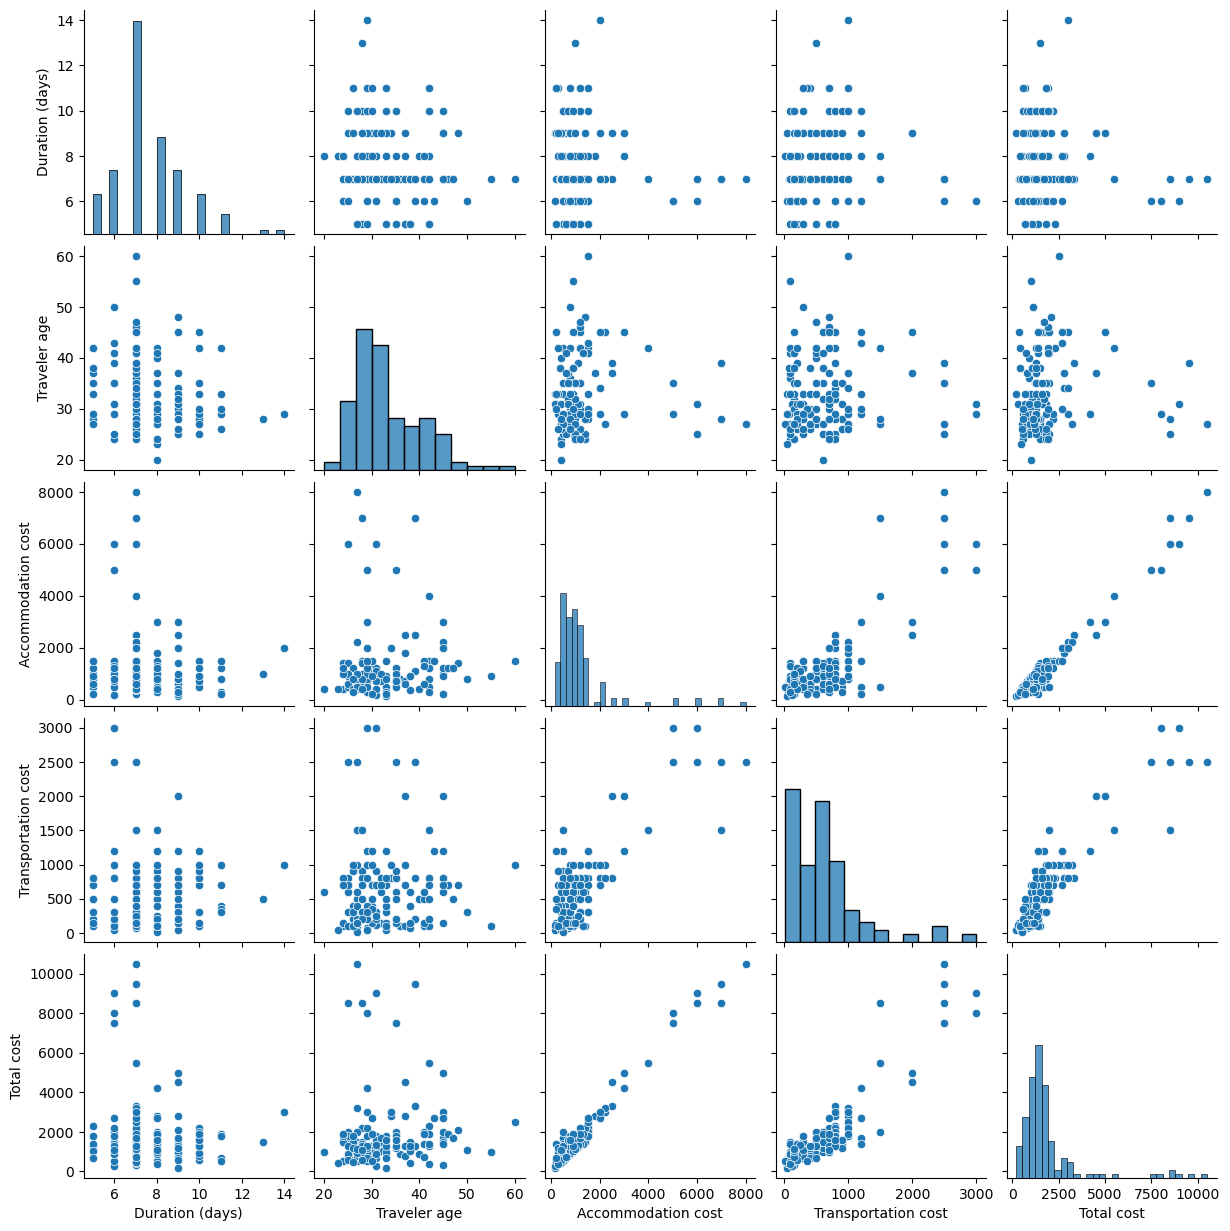

In [52]:
sns.pairplot(df)

C:\Users\Selma\AppData\Local\Temp\ipykernel_3700\497450364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total cost'], bins=50)
c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


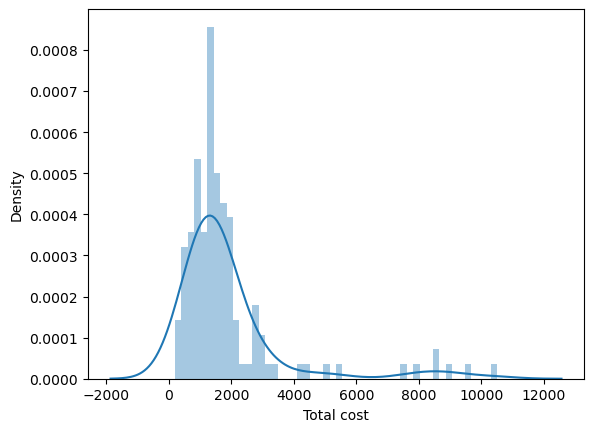

In [53]:
sns.distplot(df['Total cost'], bins=50)
plt.show()

c:\Users\Selma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


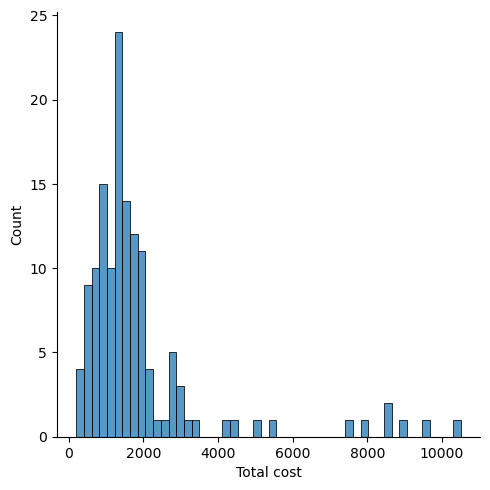

In [54]:
sns.displot(df['Total cost'], bins=50)
plt.show()

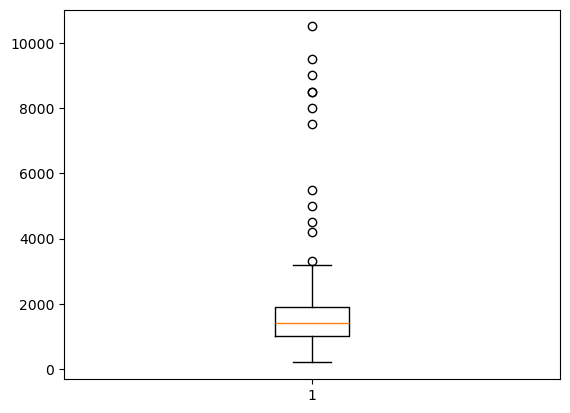

In [56]:
plt.boxplot(df['Total cost'])  
plt.show()

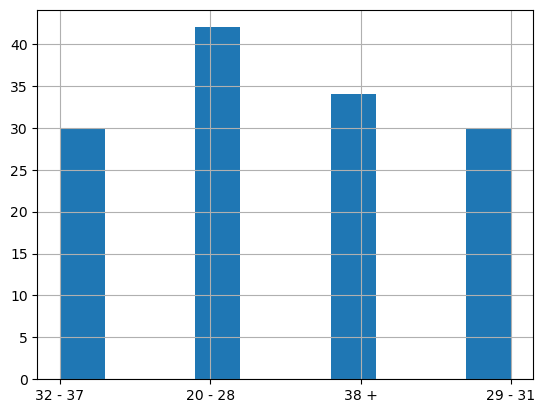

In [57]:
df["Age range"].hist()
plt.show()

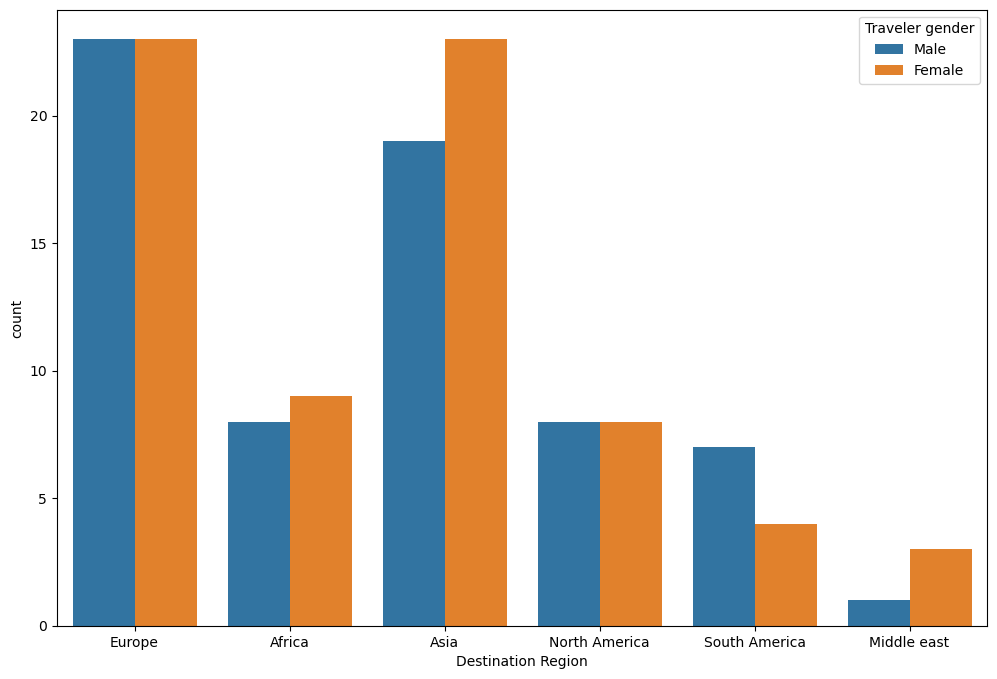

In [58]:
plt.figure(figsize=(12,8))
sns.countplot(x="Destination Region", hue="Traveler gender", data = df) ## just to get the filter F and M
plt.show()


In [60]:
df.columns

Index(['Destination', 'Duration (days)', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost', 'Age range',
       'Destination Region', 'Traveler Region', 'Trip month', 'Total cost',
       'Budget'],
      dtype='object')

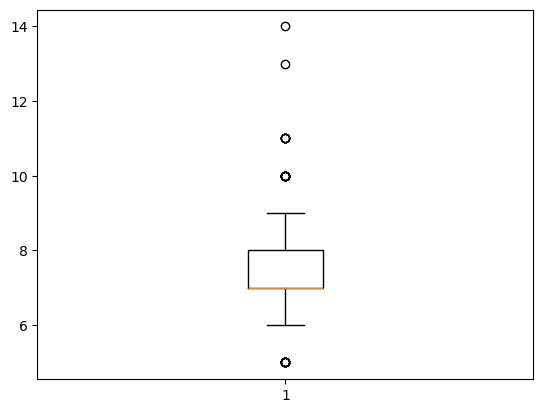

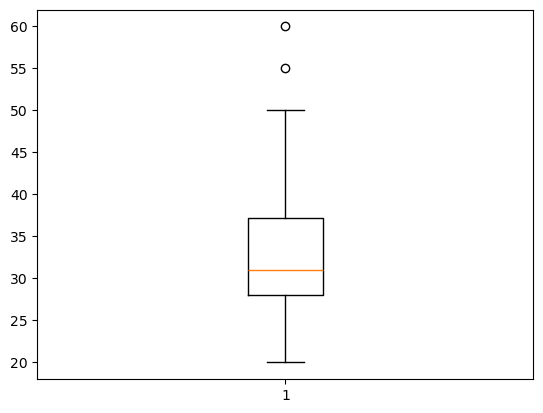

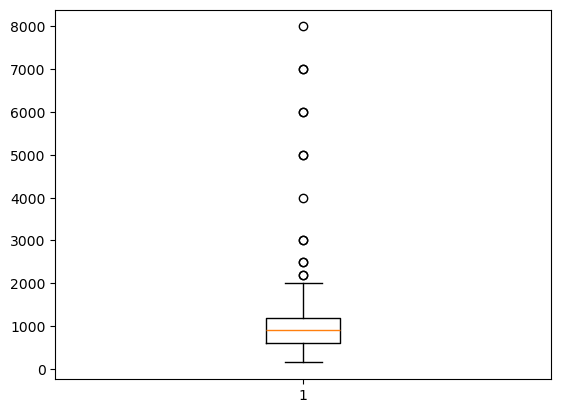

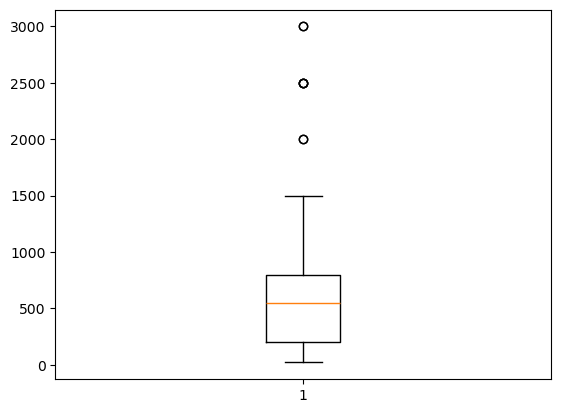

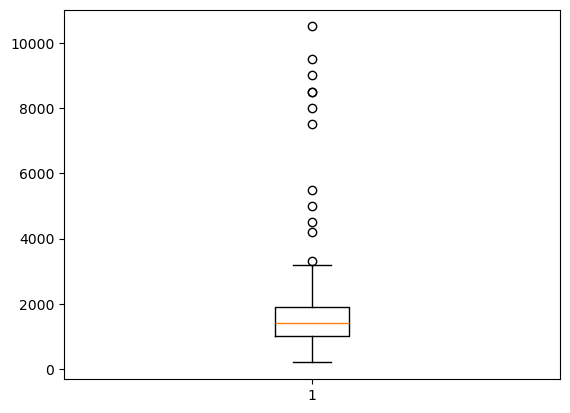

In [61]:
columns = ['Duration (days)', 'Traveler age', 'Accommodation cost', 'Transportation cost', 'Total cost']
for col in columns:
    plt.boxplot(df[col])
    plt.show()

In [63]:
df.to_csv(r"C:/Users/Selma/Desktop/Ironhack/labs/MID PROJECT/travel_dataset_cleaned.csv")